In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prim
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
%matplotlib inline

In [4]:
sns.set_context("notebook",rc={"font.size": 18})
sns.set_style("whitegrid")

In [5]:
data = pd.read_excel("SAMBA scenario results all runs.xlsx","Capitalinv Variable and Fixed")

In [6]:
data.sample(10)

,DMD,FUEL,CC RE,DR,CO2,CC,Parameter (million USD),2013,2014,2015,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
515,2,3,1,2,2,2,CapitalInvestment,84.154143,23670.058011,34337.637592,...,53908.715508,50616.231459,64400.687154,58178.942308,67254.349991,64017.730671,64808.816753,80313.701130,73915.467991,85875.946094
831,3,3,1,2,1,2,AnnualFixedOperatingCost,6182.619278,6474.533316,6915.290859,...,15955.728524,16616.917949,17575.317102,18491.694933,19569.328049,20864.652248,22290.582375,23458.504852,24197.967720,25097.314419
748,3,1,2,3,2,2,AnnualVariableOperatingCost,23746.320138,24698.555034,14667.242685,...,46855.785545,45166.119681,44749.447437,46931.862717,47845.794837,48128.233861,48368.930386,48532.655997,49161.186458,49187.310445
61,1,1,2,1,2,1,AnnualVariableOperatingCost,23736.982014,25166.563181,14690.847642,...,19955.530061,20189.117379,20607.627402,20879.278614,21444.436393,21781.712963,21970.517108,22444.434890,23029.095010,22948.776001
561,2,3,2,2,1,2,AnnualFixedOperatingCost,6182.605822,6474.517184,6915.272567,...,14015.243058,14566.269842,15340.502617,16169.935918,17106.928380,17971.187358,18841.614751,19807.304595,20405.662022,21114.620845
447,2,1,3,1,3,2,AnnualFixedOperatingCost,6183.985644,6476.058218,6916.946121,...,13676.621117,13870.653739,14221.537062,14548.842047,14828.502053,15169.306410,15506.983762,15855.913025,16174.437964,16552.639332
446,2,1,3,1,3,1,CapitalInvestment,133.712600,21134.797306,30151.700539,...,49166.892971,45908.550473,52107.973684,48127.976603,55299.599241,47349.207387,45563.074750,49525.837437,50714.384304,51490.929624
897,3,3,2,2,3,2,AnnualFixedOperatingCost,6182.609141,6474.523179,6915.281375,...,13305.850662,13580.876236,14026.030632,14406.810295,14764.780096,15164.755340,15564.888886,16003.163092,16451.116939,16938.151467
22,1,1,1,2,1,2,AnnualVariableOperatingCost,23737.837688,24770.857110,14728.126887,...,20016.598149,19854.839580,20982.355298,21845.543812,22388.535434,21487.832323,20564.493504,20145.786046,20630.643341,20901.538541
641,2,3,3,3,2,2,CapitalInvestment,24.570676,29531.643049,44201.333342,...,99552.108942,110722.155822,127948.979601,121335.403082,126893.619983,124239.664359,117243.310765,118002.986342,117296.216347,101075.688775


In [7]:
data.columns

Index(['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC', 'Parameter (million USD)',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030',
       '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039',
       '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048',
       '2049', '2050'],
      dtype='object')

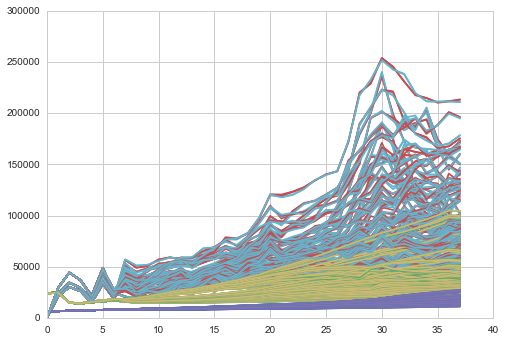

In [73]:
plt.plot(data.set_index(['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC', 'Parameter (million USD)']).T)

In [14]:
new_data = data.set_index(['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC', 'Parameter (million USD)']).sum(axis=1).unstack("Parameter (million USD)").reset_index()

In [15]:
inputs = new_data[['DMD', 'FUEL', 'CC RE', 'DR', 'CO2', 'CC']]

In [31]:
new_data[['CapitalInvestment','AnnualFixedOperatingCost','AnnualVariableOperatingCost']].describe()

,CapitalInvestment,AnnualFixedOperatingCost,AnnualVariableOperatingCost
count,324.000000,324.000000,324.000000
mean,2109219.056634,412459.069929,991662.311432
std,647803.352284,41429.216989,268954.476966
min,1234210.622922,335244.175023,640693.861770
25%,1601038.743285,386200.934999,794806.599700
50%,1958793.799071,406839.405427,902249.384337
75%,2414729.502342,433880.442881,1139904.216711
max,4319112.558107,521387.835738,1881458.116590


In [37]:
new_data['tot_cost'] = new_data[['CapitalInvestment','AnnualFixedOperatingCost','AnnualVariableOperatingCost']].sum(axis=1)

In [38]:
new_data['tot_cost'].describe()

count        324.000000
mean     3513340.437996
std       751625.363713
min      2459949.517758
25%      2932343.222555
50%      3375899.511800
75%      3950609.803004
max      6076921.979883
Name: tot_cost, dtype: float64

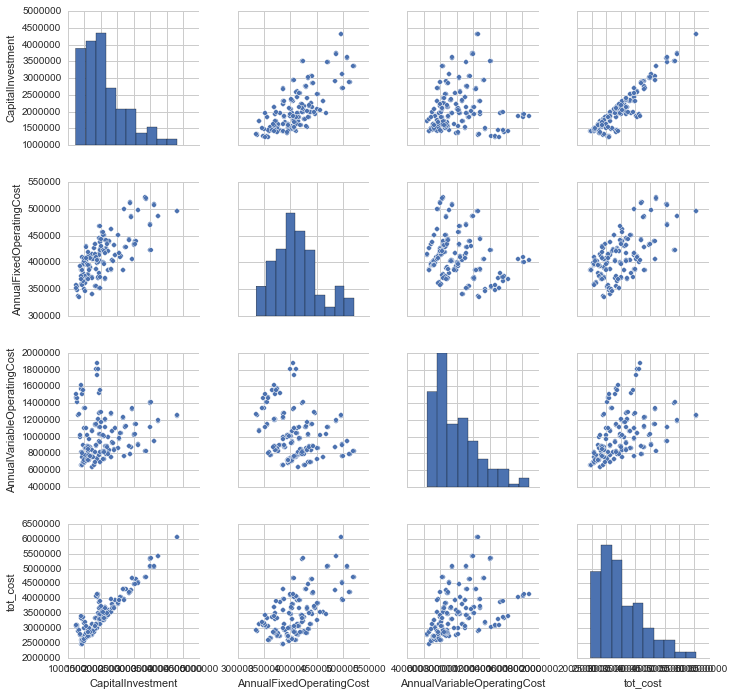

In [67]:
sns.pairplot(new_data[['CapitalInvestment','AnnualFixedOperatingCost','AnnualVariableOperatingCost','tot_cost']])

### I first do the scenario discovery with contraints on the 3 variables (capital cost, fix operating cost and variable operating cost), making sure the three as in the low part of the distribution

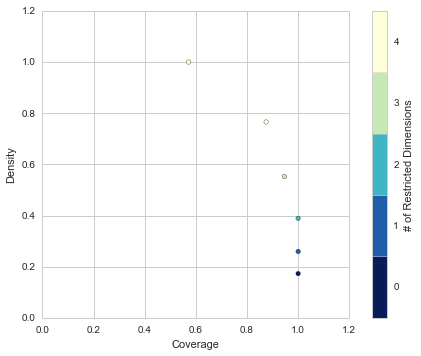

In [56]:
scenarofinterest = (new_data.CapitalInvestment<2*10**6)&(new_data.AnnualFixedOperatingCost<4*10**5)&(new_data.AnnualVariableOperatingCost<9*10**5)
p = prim.Prim(inputs, scenarofinterest, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

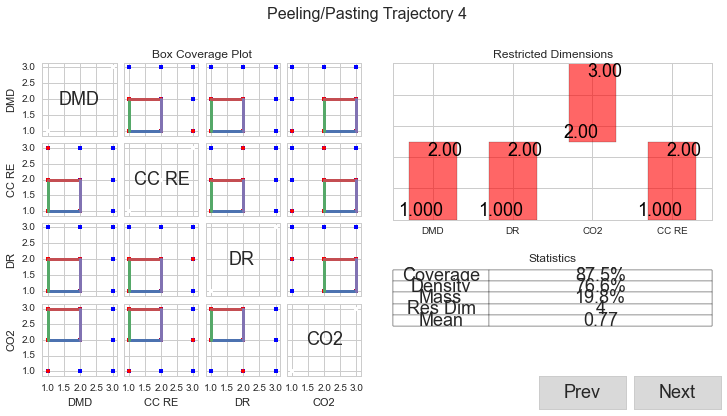

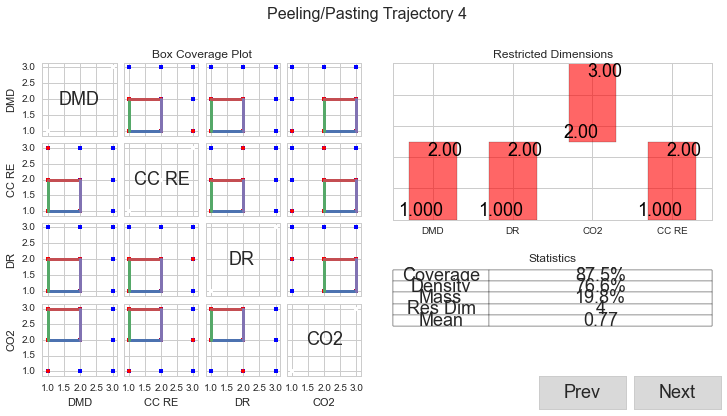

In [57]:
box.select(4)
box.show_details()

In [58]:
print(box)

Box 1 [Peeling Trajectory 4]
    Stats
        Coverage: 0.875000
        Density:  0.765625
        Mass:     0.197531
        Res Dim:  4.000000
        Mean:     0.765625
    Limits
               min  max  qp values
        DMD      1    2   0.000025
        DR       1    2   0.000025
        CO2      2    3   0.000179
        CC RE    1    2   0.000330


### The result is that demand should be 1 or 2, discount rate 1 or 2, CO2 1 or 2 and CC RE 1 or 2 

### now I want a small total cost

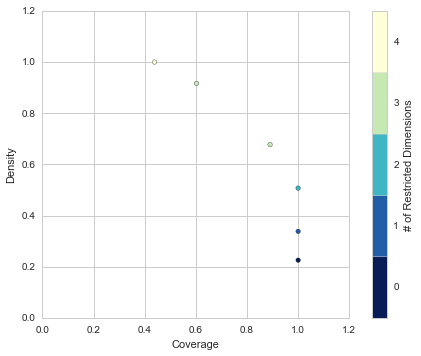

In [59]:
scenarofinterest = (new_data.tot_cost<2.9*10**6)
p = prim.Prim(inputs, scenarofinterest, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [60]:
box.select(3)
print(box)

Box 1 [Peeling Trajectory 3]
    Stats
        Coverage: 0.890411
        Density:  0.677083
        Mass:     0.296296
        Res Dim:  3.000000
        Mean:     0.677083
    Limits
             min  max  qp values
        DMD    1    2   0.000007
        DR     1    2   0.000007
        CO2    2    3   0.000548


### the result is demand 1 or 2 and discount rate 1 or 2 and CO2 1 or 2

### now I try each constraint individually

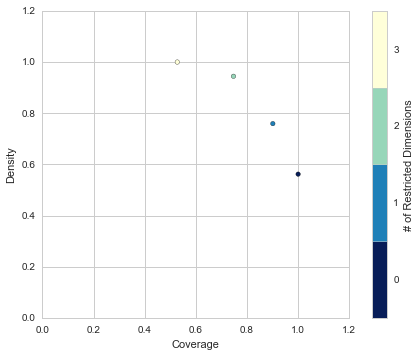

In [61]:
scenarofinterest = (new_data.CapitalInvestment<2*10**6)
p = prim.Prim(inputs, scenarofinterest, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [62]:
box.select(2)
print(box)

Box 1 [Peeling Trajectory 2]
    Stats
        Coverage: 0.747253
        Density:  0.944444
        Mass:     0.444444
        Res Dim:  2.000000
        Mean:     0.944444
    Limits
             min  max     qp values
        DMD    1    2  2.101543e-12
        CO2    2    3  2.796232e-09


### capital investment is low if demand is 1 or 2 and CO2 is 1 or 2 

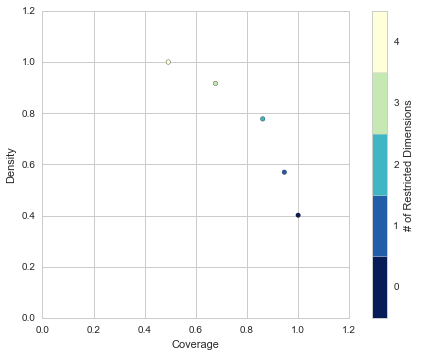

In [63]:
scenarofinterest = (new_data.AnnualFixedOperatingCost<4*10**5)
p = prim.Prim(inputs, scenarofinterest, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [64]:
box.select(2)
print(box)

Box 1 [Peeling Trajectory 2]
    Stats
        Coverage: 0.861538
        Density:  0.777778
        Mass:     0.444444
        Res Dim:  2.000000
        Mean:     0.777778
    Limits
             min  max     qp values
        CO2    2    3  1.219305e-08
        DMD    1    2  1.337454e-07


### fixed operating cost is low if demand is low and CO2 is 1 or 2 

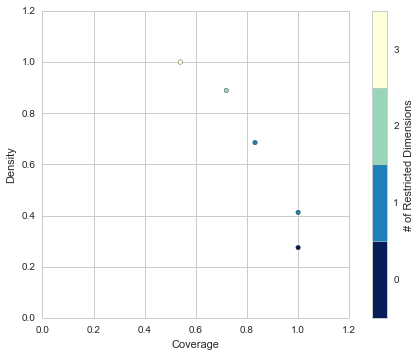

In [68]:
scenarofinterest = (new_data.AnnualVariableOperatingCost<8*10**5)
p = prim.Prim(inputs, scenarofinterest, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [70]:
box.select(3)
print(box)

Box 1 [Peeling Trajectory 3]
    Stats
        Coverage: 0.719101
        Density:  0.888889
        Mass:     0.222222
        Res Dim:  2.000000
        Mean:     0.888889
    Limits
             min  max     qp values
        DR     1    1  3.723194e-20
        DMD    1    2  4.814984e-05


### variable operating cost is low if discount rate is low and demand is low: why is that? I was expecting it to demand more on the CO2 constaint